# Image Sensor Modeling

In most introductory machine learning exercises, the process of training models to fit and make inferences from datasets is considered but the process of how the data was collected and the physics of the sensor that collected it is not. In most practical machine learning use cases, the data we are learning from originated somewhere in the real world (e.g., if we are learning to classify object in images, patterns in audio, etc.) and had to be transferred to the digital world by some physical and human process. A sensor, like a camera, a microphone, a radio, an X-ray machine, or some other transducer had to measure some aspect of the real world (like the number of photons emitting from a surface in the case of a camera) and convert that measurement to digital data for us to perform any machine learning. This is a messy process since the real world itself contains noise in the form of other objects and patterns that are not of interest, and in the form of inherent randomness. The sensor doing the measuring has physical limitations and inherent randomness of its own, which compound the noise in the real world.

As we will see, considering the physical processes by which a dataset was collected is a key practice in the development of production grade ML models, and can also open the door to new capabilities and model tasks entirely that we might not have thought of or been able to execute without these considerations. Here will will consider digital images, as taken by digital cameras in the visual light spectrum, but the discussion and practices apply to many different sensor types used to collect data for machine learning. Given how much we use digital images, we often take the process by which they capture digital image data for granted. With high quality digital imaging systems at our fingertips, it is easy to assume that the imagery they capture perfectly represents the true objects captured. However, this is not the case, even for high quality image sensors, and especially under challenging conditions, such as low light, high contrast, long range, and difficult atmospheres. Those with a photography background may be familiar with some of these considerations.

By taking these into account, we can ensure that our models performing object recognition tasks will be robust to noise and distortions that real world sensors will introduce, which is especially important if we expect our production models will need to be used with other sensors outside those used to build the training set. If we are not careful during training, we might introduce bias where some classes in our data were collected by some sensors and other classes were collected by others, leading our models to incorrectly associate sensor type or collection scenario with the class of object sensed! Similarly, we might find that different sensors have different limitations. One sensor might provide our model with enough usable data even in low light conditions, while another does not. Some sensors may capture our objects in higher fidelity than others, especially around the edges of objects, leading brittle models to misclassify objects when these assumptions are broken.

Beyond ensuring that models performing basic tasks do so robustly, considering the physics of how data is collected for machine learning applications can open the door for new tasks entirely. One example that has been studied for the past two decades is digital forensics. For digital forensics applications, we might want to verify that an image is not a forgery, which requires training a model specifically to be sensitive to the unique peculiarities of a particular sensor so the model can recognize when data was collected by that sensor and not by others. This can be useful, for example, in detecting "doctored" or "photo-shopped" images, and in spotting AI-generated fakes (using AI to beat AI!). These applications are more important now than ever as fake images are easier and easier to generate. Another application of digital forensics is in inferring the type of camera that collected an image. This can be useful in crime scene investigation to determine if a witness really captured a video claimed to be captured. Training models to recognize the peculiarities of individual sensors can help detect if a video was claimed to be captured by one witness but in reality does not match the expected statistics of a video captured from their device.


## Why Modeling?

Since collecting datasets from many different sensor types is a time consuming and expensive process, modeling sensor types (using physics rather than ML methods) is a key enabler in ensuring we can represent sensor effects for robustness testing typical tasks and for training models for digital forensics tasks. While there is no substitute for real world data, the cost of collecting real world data multiple times from multiple (sometimes expensive) devices creates significant motivation for industry to develop sensor models. Sensor modeling is often something individual firms will spent significant resources on, and a firm's sensor models will often be proprietary in industry. Even when firms have the resources to collect real data from a diversity of sensors, sensor modeling still allows sensor parameters can be varied in a controlled manner and remains a key part of the process of deploying production quality ML.

**Note**: the work "model" is overloaded here with two distinct definitions! In a machine learning context, a model refers to a trained algorithm. In a sensor context, a model refers to a mathematical description of the sensor and its limitations that allows us to simulate collecting data as if we are using that sensor. This is a common point of confusion, both with new students and when interacting with clients unfamiliar with machine learning details. Sensor modeling has been around industry longer than ML modeling so when an ML practitioner says "model" a client might sometimes assume they mean "simulation". Always be sure to define terms, especially when working with clients!

## Python Basic Sensor Model (PyBSM)

Collecting data from a diversity of real sensors is certainly beyond our scope in this class, and we do not have access to proprietary sensor models of course, so we will look to open source. Fortunately, for our purposes, a well-maintained open source project provides an image sensor model, the [Python Basic Sensor Model (PyBSM)](https://github.com/Kitware/pybsm) that will allow us to explore all these concepts in detail.

PyBSM is a Python based tool that provides common components for simulating the image formation process through different imaging sources. It was originally developed by the Air Force Research Laboratory (AFRL) and is maintained as an open source project. It is well documented and has been validated by independent researchers, and is suitable for our purposes here.

This notebook shows how to use some of PyBSM's basic functionality. We will discuss additional functionality in class and take a look at PyBSM's documentation to see what else it can do.

### Installation

PyBSM uses poetry and can be installed with

```bash
poetry add pybsm[graphics]
```

### References

PyBSM is reviewed in detail in the following references.

[1] LeMaster, Daniel A., and Michael T. Eismann. ‘pyBSM: A Python Package for Modeling Imaging Systems’. Society of Photo-Optical Instrumentation Engineers (SPIE) Conference Series, edited by Eric J. Kelmelis, vol. 10204, 2017, p. 1020405, https://doi.org10.1117/12.2262561. Society of Photo-Optical Instrumentation Engineers (SPIE) Conference Series.

[2] LeMaster, Daniel, et al. Validating pyBSM: A Python Package for Modeling Imaging Systems. 05 2018, p. 19, https://doi.org10.1117/12.2305228.


## Aside - Deciding when to Use an Open Source Project 

While the Python ecosystem has many industry standard open source libraries (like `pandas` and `torch`), there are also lesser known libraries, like PyBSM that can be useful. Integrating another open source project into your own can prevent "reinventing the wheel", save time, and help make our projects more maintainable by relying on code that is already maintained by another team. However, there are also risks and dependencies to consider especially when working professionally. It is a best practice to carefully balance the time saved in integrating open source tools with the needs of your particular project.

In academic and personal work, we are used to integrating new dependencies into our projects without much thought, but in professional work, we should consider all of the following when deciding to integrate a new dependency.

* Who is it made by? Are they a reliable source? What are their credentials?
* How many people was it made by? A team or an individual?
* Who is it maintained by? How many people?
* How often is it updated? When was it last updated?
* How well documented is it? Is there a support community?
* Is there contributor documentation? If you need a feature is there a clear way to request it?
* What are the dependencies? Will they conflict with any other project dependencies? How standard are they and are they well maintained?
* Have there been independent evaluations?
* Is there backing in the methods used in peer reviewed literature?
* What is the license of the project? Is it free to use for your use case? Are there restrictions that prevent your use case?
* When working professionally:
    * If there is a license, can your project's budget incur the cost?
    * Will the license affect your profit margins?
    * Does your organization have an open source approval process?
    * How quickly will the inclusion of this dependency by approved? Will approval change project schedule?
    * Does it need to be installed on your production system or just on your development system? Are there additional approvals required to install it on your production system?
    * Who from your organization needs to be consulted / informed? Your software architect? Your manager?
    * Does your customer need to be informed? Do they have expectations on the dependencies your project will have?

In this case, the answers to all these questions checkout for our purposes, but it is important to call out that these questions must be asked.

## Imports

We start with the usual basic imports, and import PyBSM's `simulation`.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

import pybsm.simulation as simulation

plt.rcParams["font.size"] = 16
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

asset_dir = "/workspaces/fall-2024-class-06/notebooks/data/images"

To start, let's look at a simple image of a car.

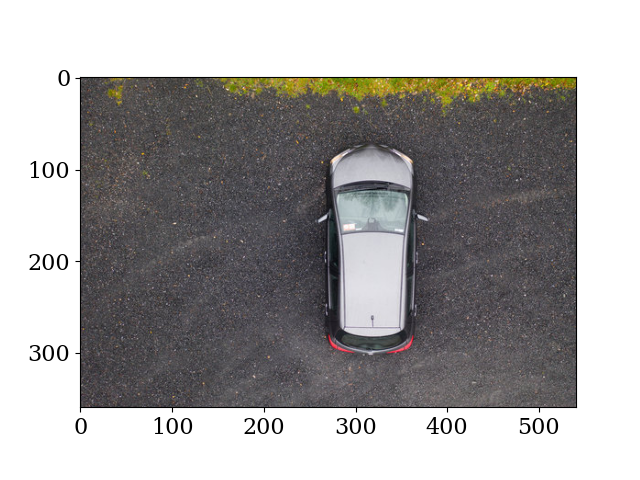

In [2]:
image_file = asset_dir + "/car_overhead.jpg"
image = plt.imread(image_file)

plt.figure()
plt.imshow(image)
plt.show()

We need to find the length of the car in pixels so we can tell PyBSM how many pixels equate to a meter for scale. There are fancier ways we can do this but for now we'll just do it manually.

Figuring our how many pixels long our car is enables us to estimate the [Ground Sample Distance (GSD)](https://en.wikipedia.org/wiki/Ground_sample_distance), which measures the distance in meters between pixel centroids.

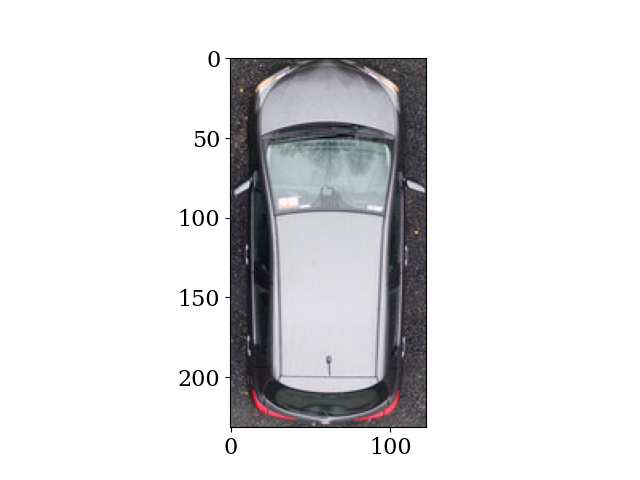

In [3]:
start_px_y = 73
end_px_y = 305

start_px_x = 257
end_px_x = 380

image_cropped_to_car = image[start_px_y:end_px_y, start_px_x:end_px_x, :]

plt.figure()
plt.imshow(image_cropped_to_car)
plt.show()

Assuming the car is approximately 15 ft long, we can estimate the GSD.

In [4]:
FT_TO_METERS = 0.3048
car_length_ft = 15
car_length_meters = car_length_ft * FT_TO_METERS
car_length_px = end_px_y - start_px_y
gsd_meters_per_px = car_length_meters / car_length_px

PyBSM requires the user to specify a [reference image](https://pybsm.readthedocs.io/en/latest/_implementations/simulation/pybsm.simulation.ref_image.html). To model how different sensors will change the image had they collected it, PyBSM needs to estimate how the sensor that collected the image affected it. The reference image will help PyBSM estimate these parameters. The essential parameters to specify are the image itself (in this case as a 3xNxM array) and the GSD.

In [5]:
reference_image = simulation.RefImage(image, gsd=gsd_meters_per_px)

With the reference image set, we need to tell PyBSM to estimate the parameters with which it was captured. These will be PyBSM's estimates of the parameters of the sensor that captured the image. We'll estimate them here and then take a look at them.

In [6]:
sensor, scenario = reference_image.estimate_capture_parameters(altitude=1000)

This code snippet uses some Python tricks to help us inspect the objects that PyBSM gives back to us.

In [7]:
def print_attributes(my_object):
    print(
        "\n".join(
            [
                attribute
                for attribute in dir(my_object)
                if not attribute.startswith("_")
            ]
        )
    )


print_attributes(sensor)

D
L_x
L_y
bit_depth
cold_filter_emissivity
cold_filter_temperature
cold_filter_transmission
cold_shield_temperature
da_x
da_y
dark_current
eta
f
filter_kernel
frame_stacks
int_time
max_n
max_well_fill
n_tdi
name
opt_trans_wavelengths
optics_emissivity
optics_temperature
optics_transmission
other_irradiance
other_noise
p_x
p_y
pv
pv_wavelength
qe
qe_wavelengths
read_noise
s_x
s_y
w_x
w_y


These are all of the parameters that define how PyBSM models the way a sensor distorts an image when collecting that image. We can read about them [here](https://pybsm.readthedocs.io/en/latest/_implementations/simulation/pybsm.simulation.sensor.Sensor.html) and will discuss some of them in class.

In [9]:
print(sensor.D)
print(sensor.L_x)
print(sensor.L_y)
print(sensor.bit_depth)
print(sensor.dark_current)

0.10960629921614568
0.10960629921614568
0.10960629921614568
100.0
0


In [11]:
print_attributes(scenario)

aircraft_speed
altitude
atm
background_reflectance
background_temperature
cn2_at_1m
ground_range
ha_wind_speed
ihaze
name
target_reflectance
target_temperature


In [13]:
print(scenario.aircraft_speed)
print(scenario.altitude)
print(scenario.background_temperature)
print(scenario.cn2_at_1m)

0
1000
293
0


Finally, we can convert to an 8-bit image so our pixel values will be integers between 0 and 255.

In [14]:
image_out = simulation.simulate_image(reference_image, sensor, scenario)[2]
image_out_8bit = simulation.stretch_contrast_convert_8bit(image_out)

/workspaces/fall-2024-class-06/.venv/lib/python3.12/site-packages/pybsm/otf/functional.py:155: RuntimeWarning: divide by zero encountered in divide
  np.arccos(rho / eta / r0)
/workspaces/fall-2024-class-06/.venv/lib/python3.12/site-packages/pybsm/otf/functional.py:155: RuntimeWarning: invalid value encountered in divide
  np.arccos(rho / eta / r0)
/workspaces/fall-2024-class-06/.venv/lib/python3.12/site-packages/pybsm/otf/functional.py:156: RuntimeWarning: divide by zero encountered in divide
  - (rho / eta / r0) * np.sqrt(1.0 - (rho / eta / r0) ** 2.0)
/workspaces/fall-2024-class-06/.venv/lib/python3.12/site-packages/pybsm/otf/functional.py:156: RuntimeWarning: invalid value encountered in divide
  - (rho / eta / r0) * np.sqrt(1.0 - (rho / eta / r0) ** 2.0)
/workspaces/fall-2024-class-06/.venv/lib/python3.12/site-packages/pybsm/otf/functional.py:164: RuntimeWarning: divide by zero encountered in divide
  phi = np.arccos((1.0 + eta**2.0 - (2.0 * rho / r0) ** 2) / 2.0 / eta)
/workspace

Even the conversion to 8 bit pixel values itself affects the image slightly.

It may not look like much of a difference at first glance...

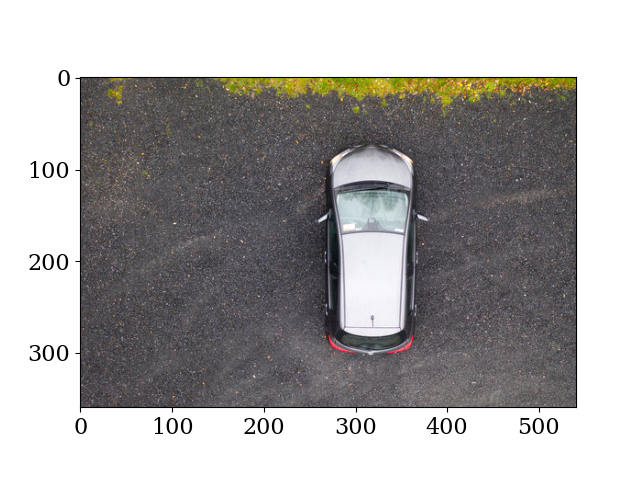

In [15]:
plt.figure()
plt.imshow(image_out_8bit)
plt.show()

However when we look at the difference with the original image we can see how this step affects it. Some of the extreme dark and light regions are most affected.

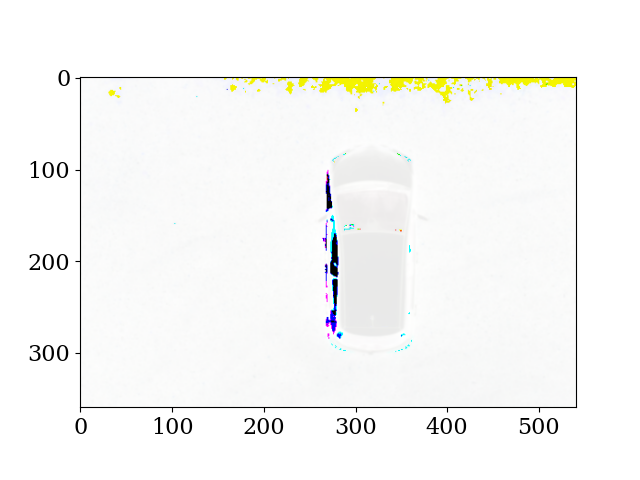

In [16]:
plt.figure()
plt.imshow(image - image_out_8bit)
plt.show()

In [20]:
f = 4  # Telescope focal length (m)
D = 275e-3  # Telescope diameter (m)
p = 0.008e-3  # Detector pitch (m)

# Optical system transmission, red  band first (m)
opt_trans_wavelengths = np.array([0.58 - 0.08, 0.58 + 0.08]) * 1.0e-6

ihaze = 1
altitude = 9000

scenario = simulation.Scenario(
    "virtual_camera", ihaze, altitude, ground_range=1000
)
sensor = simulation.Sensor("virtual_camera", D, f, p, opt_trans_wavelengths)
ground_ranges = np.arange(0, 101e3, 10e3)

In [ ]:
reference_image.refl_values = np.array([0.05, 0.5])
idx = 1
plt.subplot(2, 4, 1)
plt.title("Input image", fontdict={"fontsize": 8})
plt.imshow(
    simulation.stretch_contrast_convert_8bit(reference_image.img), cmap="gray"
)
for idx, ground_range in ground_ranges:
    idx += 1
    plt.subplot(2, 4, idx)
    plt.suptitle(
        "ihaze-" + str(ihaze) + "_altitude-" + str(altitude), fontsize=10
    )
    plt.title(
        "groundRange: " + str(ground_ranges[ii] / 1000) + " km",
        fontdict={"fontsize": 6},
    )
    scenario.ground_range = ground_ranges[ii]
    img_out = simulation.simulate_image(reference_image, sensor, scenario)[2]
    img_out = simulation.stretch_contrast_convert_8bit(img_out)
    plt.imshow(img_out, cmap="gray")
plt.show()